<a href="https://colab.research.google.com/github/littlefieldnick/3D-Medical-Imaging/blob/master/3D_Medical_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import torch

# Part 1: Training and Validation Setup
Workflow

- Download the training and validation data.
Note that this the uncompressed dataset in the introduction.
- Open a pair of T1-w and T2-w images (the first six characters of the filename identifies a unique subject).
- Plot a slice of the 3D image volume to the screen from both images and verify that the anatomy approximately aligns.

In [ ]:
# !unzip '/content/drive/My Drive/3D Medical Imaging Analysis/small_data.zip'

In [129]:
def load_image(t1_file, t2_file):
  """
  Load a give T1-w and T2-w pair

  Args:
    - t1_file: Path to T1-w image
    - t2_file: Path to T2-w image

  Returns:
    (t1, t2): tuple containing loaded T1-w and T2-w images
  """

  t1, t2 = nib.load(t1_file).get_fdata(), nib.load(t2_file).get_fdata()

  return (t1, t2)

In [130]:
t1_pth = "/content/small/t1/IXI102-HH-1416-T1_fcm.nii.gz"
t2_pth = "/content/small/t2/IXI102-HH-1416-T2_reg_fcm.nii.gz"

In [132]:
t1, t2 = load_image(t1_pth, t2_pth)

In [133]:
t1.shape, t2.shape

((120, 120, 90), (120, 120, 90))

In [140]:
def display_axial_view(t1, t2, slice):
  """
  Display the axial view for T1 and T2 images for a given slice

  Args:
    - t1: T1-w Image
    - t2: T2-w Image
    - slice: The slice of the axial view to display
  """

  f, ax = plt.subplots(1, 2)
  ax[0].imshow(t1[:, :, 30], cmap="gray"); ax[1].imshow(t2[:, :, 30], cmap="gray")
  ax[0].set_title("T1", fontsize=18); ax[1].set_title("T2", fontsize=18)
  ax[0].axis("off"); ax[1].axis("off")


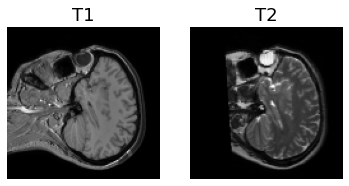

In [141]:
display_axial_view(t1, t2, 30)